## Проектная работа по модулю "Математика и статистика в Python" от 06.10.2019 г.
ФИО: Кривова Татьяна Сергеевна

**1**. Загрузить файл hr.csv

In [2]:
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
import statistics
import numpy as np

In [3]:
raw_data = pd.read_csv('hr.csv') # raw_data.shape --> (14999, 10)

In [5]:
raw_data.info()
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   
5                   3              0     1                      0  sales   
6                   4              0     1                      0  sales   
7                   5              0     1                      0  sales   
8                   5              0     1                      0  sales   
9                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

**2**. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
raw_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [7]:
raw_data.mode()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN

In [8]:
try:
    print(f'\tМода {statistics.mode(raw_data.average_montly_hours)}')
except Exception as ex:
    print('Внимание:', ex)

Внимание: no unique mode; found 2 equally common values


In [4]:
# Подробный отчет по датасету
pandas_profiling.ProfileReport(raw_data)

**3**. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [9]:
correlations = raw_data.corr()
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

Text(0.5, 1, 'Матрица корреляции в виде тепловой карты (sns.heatmap)')

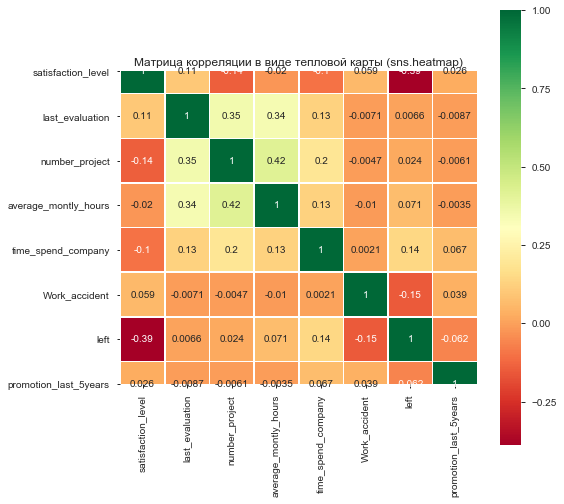

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

plt.title('Матрица корреляции в виде тепловой карты (sns.heatmap)', fontsize=12)

**4**. Визуализировать несколько взаимосвязей между переменными.

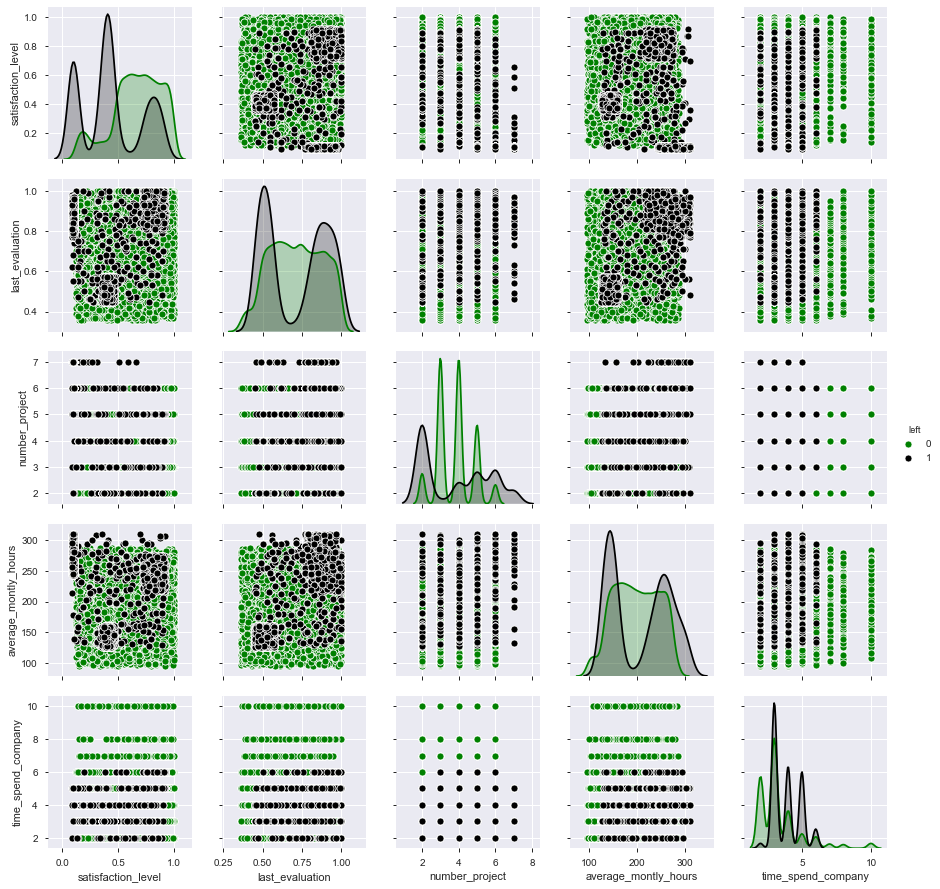

In [11]:
sns.pairplot(raw_data,\
             vars=["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"],\
             hue='left', palette={0:'green', 1:'black'})

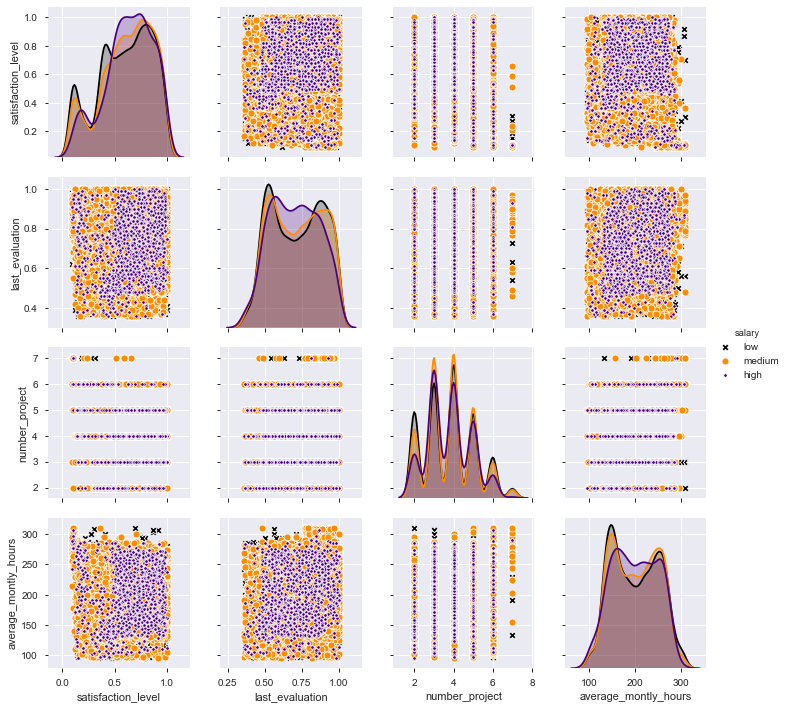

In [12]:
sns.pairplot(raw_data,\
             vars=["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours"],\
             hue='salary', palette={'low':'black', 'medium':'darkorange', 'high':'indigo'}, markers=["X", "o", "."])

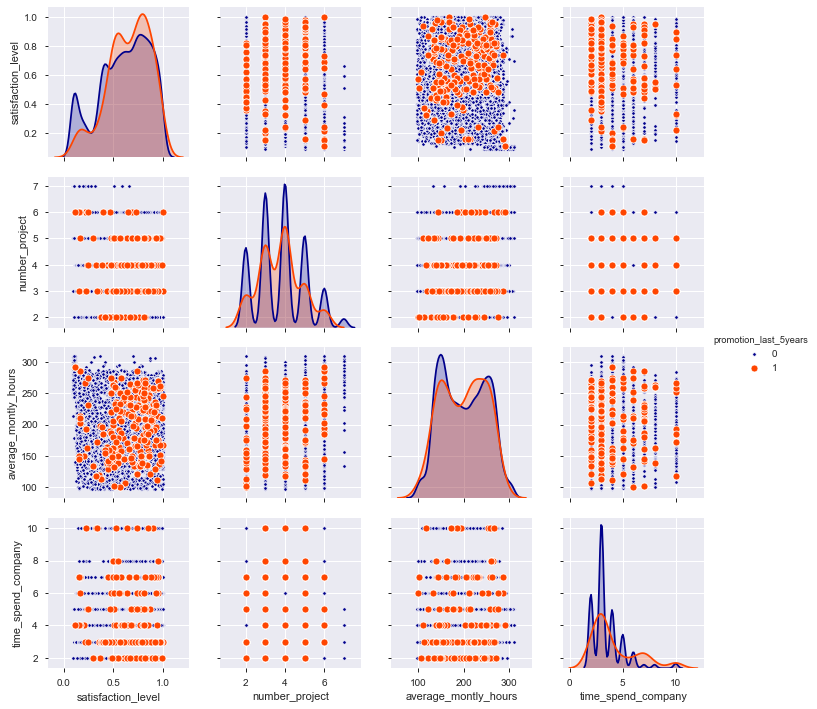

In [13]:
sns.pairplot(raw_data,\
             vars=["satisfaction_level", "number_project", "average_montly_hours", "time_spend_company"],\
             hue='promotion_last_5years', palette={0:'darkblue', 1:'orangered'}, markers=[".", "o"])

**5**. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [14]:
# 1. H0: Работники с низкой и высокой зарплатой тратят на работу в месяц одинаковое количество часов

lows = raw_data[raw_data['salary'] == 'low']['average_montly_hours']
highs = raw_data[raw_data['salary'] == 'high']['average_montly_hours']

In [15]:
len(lows), len(highs) # проверяю размеры

(7316, 1237)

In [16]:
lows_smpl = lows.sample(1200) # делаю наборы данных одинакового размера
highs_smpl = highs.sample(1200)

In [17]:
statistics.variance(lows_smpl), statistics.variance(highs_smpl) # проверяю дисперсию, различается

(2687.173360439255, 2280.9988879621906)

In [18]:
sts.ttest_ind(lows_smpl, highs_smpl, equal_var=False) # Welch's t-test
# Вывод: т.к. pvalue > 0.05, нулевая гипотеза верна

Ttest_indResult(statistic=-0.8547389672629704, pvalue=0.39278162673702366)

In [19]:
# 2. H0: Получавшие повышение работники и не получавшие повышение тратят на работу в месяц одинаковое количество часов

yes = raw_data[raw_data['promotion_last_5years'] == 1]['average_montly_hours']
no = raw_data[raw_data['promotion_last_5years'] == 0]['average_montly_hours']

In [20]:
len(yes), len(no) # проверяю размеры

(319, 14680)

In [21]:
yes_smpl = yes.sample(300) # делаю наборы данных одинакового размера
no_smpl = no.sample(300)

In [22]:
statistics.variance(yes_smpl), statistics.variance(no_smpl) # проверяю дисперсию, различается

(2255.318885172798, 2627.065507246377)

In [23]:
sts.ttest_ind(yes_smpl, no_smpl, equal_var=False) # Welch's t-test
# Вывод: т.к. pvalue > 0.05, нулевая гипотеза верна

Ttest_indResult(statistic=0.27432252654124273, pvalue=0.7839320594011709)

In [24]:
# 3. H0: Уволившиеся сотрудники, проработавшие менее 3-х лет и более 5-ти лет, имеют одинаковый уровень удовлетворенности

lefts_1 = raw_data[(raw_data['left'] == 1) & (raw_data['time_spend_company'] < 3)]['satisfaction_level']
lefts_2 = raw_data[(raw_data['left'] == 1) & (raw_data['time_spend_company'] > 5)]['satisfaction_level']

In [25]:
len(lefts_1), len(lefts_2) # проверяю размеры

(53, 209)

In [26]:
lefts_1_smpl = lefts_1.sample(50) # делаю наборы данных одинакового размера
lefts_2_smpl = lefts_2.sample(50)

In [27]:
statistics.variance(lefts_1_smpl), statistics.variance(lefts_2_smpl) # проверяю дисперсию, различается

(0.05889567346938775, 0.006912)

In [28]:
sts.ttest_ind(lefts_1_smpl, lefts_2_smpl, equal_var=False) # Welch's t-test
# Вывод: т.к. pvalue < 0.05, нулевая гипотеза неверна

Ttest_indResult(statistic=-7.717999833854385, pvalue=1.434848886082457e-10)

In [29]:
# 4. H0: Уволившиеся и работающие сотрудники с высокой зарплатой, имеют одинаковый уровень удовлетворенности

lefts = raw_data[(raw_data['left'] == 1) & (raw_data['salary'] == 'high')]['satisfaction_level']
stays = raw_data[(raw_data['left'] == 0) & (raw_data['salary'] == 'high')]['satisfaction_level']

In [30]:
len(lefts), len(stays) # проверяю размеры

(82, 1155)

In [31]:
lefts_smpl = lefts.sample(80) # делаю наборы данных одинакового размера
stays_smpl = stays.sample(80)

In [32]:
statistics.variance(lefts_smpl), statistics.variance(stays_smpl) # проверяю дисперсию, совпадает

(0.05063542721518988, 0.041531582278481013)

In [33]:
sts.ttest_ind(lefts_smpl, stays_smpl) # standard independent 2 sample test
# Вывод: т.к. pvalue < 0.05, нулевая гипотеза неверна

Ttest_indResult(statistic=-7.324905758271093, pvalue=1.1525367394697311e-11)

**6**. Рассчитать сколько работников работает в каждом департаменте.

In [34]:
raw_data.sales.value_counts() # общее количество работников, включая уволившихся

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [35]:
raw_data[raw_data['left'] == 0].sales.value_counts() # количество сотрудников в каждом департаменте (без уволившихся)

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

**7**. Показать распределение сотрудников по зарплатам.

In [36]:
raw_data.salary.value_counts() # Распределение по зарплатам общего количества работников (включая уволившихся)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

([<matplotlib.patches.Wedge at 0x39d7f30>,
 [Text(-1.0991876247748915, 0.0422677837333853, 'low'),
  Text(1.051670279124568, -0.3224742222349768, 'medium'),
  Text(0.30744588084248103, 1.1599469946307854, 'high')],
 [Text(-0.5995568862408499, 0.02305515476366471, '48.8%'),
  Text(0.5736383340679462, -0.17589503030998732, '43.0%'),
  Text(0.17934343049144727, 0.676635746867958, '8.2%')])

Text(0.5, 1.0, 'Распределение персонала по зарплатам (plt.pie)')

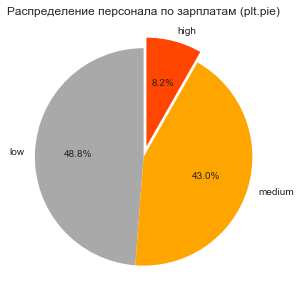

In [38]:
labels = list(raw_data.salary.unique())
sizes = [raw_data.salary.value_counts()[0], raw_data.salary.value_counts()[1], raw_data.salary.value_counts()[2]]
colors = ['darkgrey', 'orange', 'orangered']
explode = (0, 0, 0.1)

rcParams['figure.figsize'] = 5,5

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Распределение персонала по зарплатам (plt.pie)')

In [39]:
raw_data[raw_data['left'] == 1].salary.value_counts() # уволенные

raw_data[raw_data['left'] == 0].salary.value_counts() # работающие

low       2172
medium    1317
high        82
Name: salary, dtype: int64

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

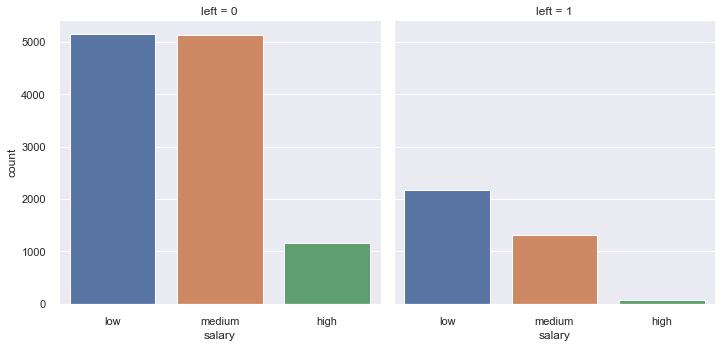

In [40]:
# Распределение сотрудников по зарплатам (sns.catplot)
sns.set(style="darkgrid")
sns.catplot(x="salary", data=raw_data, col="left", kind="count")

**8**. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [41]:
departments = list(raw_data.sales.unique())

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам (sns.countplot)')

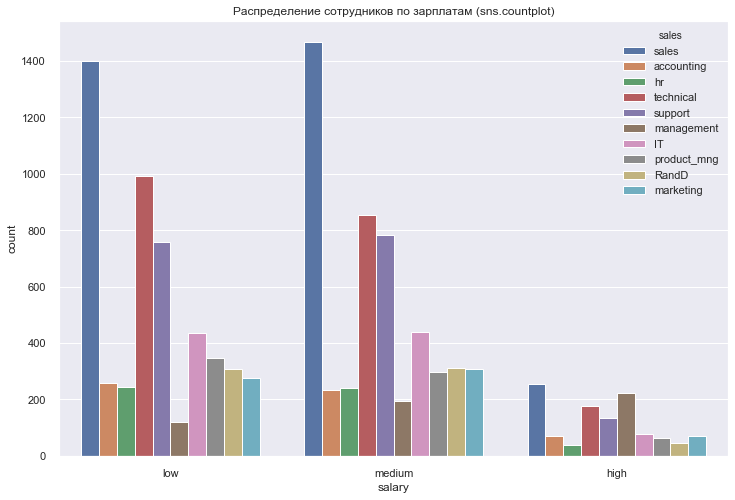

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

sns.countplot(x="salary", hue="sales", data=raw_data[raw_data['left'] == 0])
plt.title('Распределение сотрудников по зарплатам (sns.countplot)')

**9**. Сколько сотрудников покинули компанию.

In [43]:
len(raw_data[raw_data['left'] == 1])

3571

In [44]:
raw_data[raw_data['left'] == 1].sales.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

**10**. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [45]:
# Решаю задание через построение дерева и просмотр feature_importances.
# Категориальные переменные sales и salary перевожу в столбцы One-hot-encoding.

raw_data.sales.unique() # 10 подразделений
raw_data.salary.unique() # 3 категории зарплат

new_df = raw_data[['sales', 'salary']] # датафрейм для категориальных переменных

new_df['sales_dep'] = np.where(new_df.sales == 'sales', 1, 0)
new_df['accounting_dep'] = np.where(new_df.sales == 'accounting', 1, 0)
new_df['hr_dep'] = np.where(new_df.sales == 'hr', 1, 0)
new_df['technical_dep'] = np.where(new_df.sales == 'technical', 1, 0)
new_df['support_dep'] = np.where(new_df.sales == 'support', 1, 0)
new_df['management_dep'] = np.where(new_df.sales == 'management', 1, 0)
new_df['IT_dep'] = np.where(new_df.sales == 'IT', 1, 0)
new_df['product_mng_dep'] = np.where(new_df.sales == 'product_mng', 1, 0)
new_df['marketing_dep'] = np.where(new_df.sales == 'marketing', 1, 0)
new_df['RandD_dep'] = np.where(new_df.sales == 'RandD', 1, 0)

new_df['low'] = np.where(new_df.salary == 'low', 1, 0)
new_df['medium'] = np.where(new_df.salary == 'medium', 1, 0)
new_df['high'] = np.where(new_df.salary == 'high', 1, 0)

df = raw_data.join(new_df.drop(columns=['sales','salary']), how='left')

df.head()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

array(['low', 'medium', 'high'], dtype=object)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  ...  technical_dep  support_dep  management_dep  IT_dep  \
0     low  ...              0            0               0       0   
1  medium  ...              0            0               0       0   
2  medium  ...              0            0               0       0   
3     low  ...              0            0               0       0   
4     low  ...              0            0               0       0   

   product_mng_dep  marketing_dep  RandD_dep  low  medium  high  
0                0              0          0    1       0     0  
1                0              0          0    0       1     0  
2                0              0          0    0       1     0  
3                0              0          0    1       0     0  
4                0              0          0    1       0     0  

[5 rows x 23 columns]

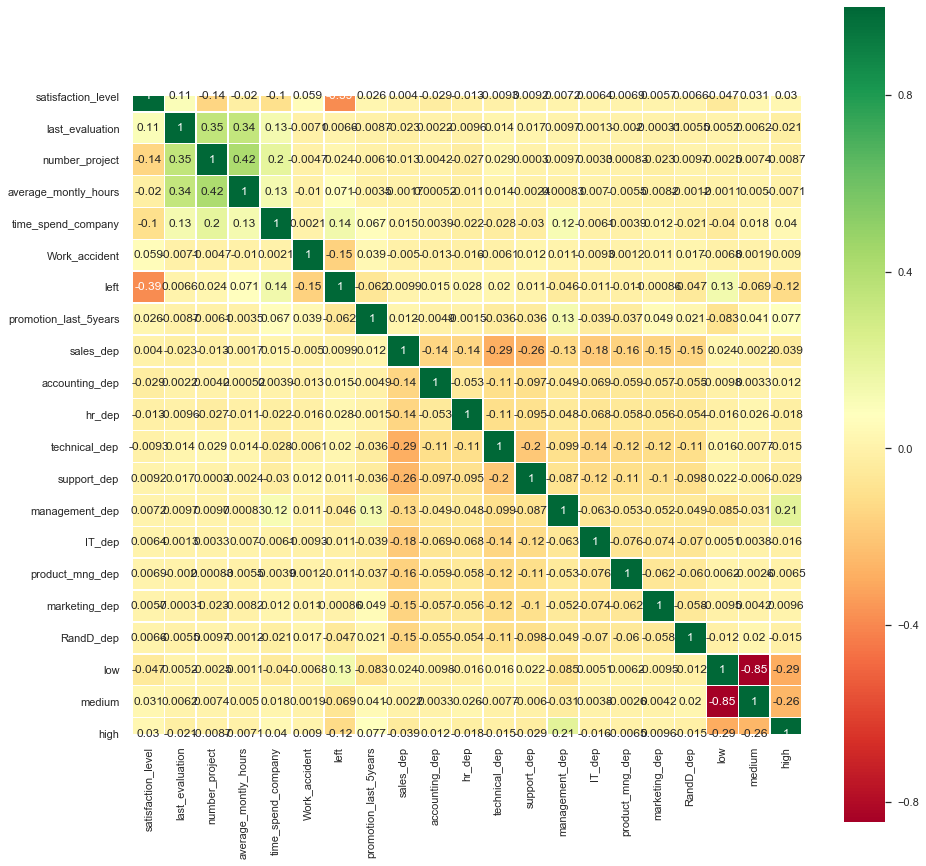

In [46]:
rcParams['figure.figsize'] = 15,15
corr_matrix = df.corr()
corr_matrix.style.set_precision(3) # матрица корреляций

sns.heatmap(corr_matrix, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

In [47]:
df[df.left == 1].shape, df[df.left == 0].shape

lefts_smpl = df[df.left == 1].sample(3500) # делаем наборы данных одинакового размера по кол-ву работающих и уволившихся
stays_smpl = df[df.left == 0].sample(3500)

lefts_smpl.shape, stays_smpl.shape

((3571, 23), (11428, 23))

((3500, 23), (3500, 23))

In [48]:
model_data = pd.concat([stays_smpl, lefts_smpl], ignore_index=True)

model_data.shape
model_data.head()

(7000, 23)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.74             0.89               3                   229   
1                0.84             0.85               4                   207   
2                0.77             0.50               5                   170   
3                0.88             0.62               4                   237   
4                0.93             0.98               4                   189   

   time_spend_company  Work_accident  left  promotion_last_5years    sales  \
0                   3              0     0                      0       IT   
1                  10              0     0                      0    sales   
2                   2              0     0                      0  support   
3                   2              0     0                      0    sales   
4                  10              0     0                      0    sales   

   salary  ...  technical_dep  support_dep  management_dep  IT_dep  \
0  medium  ...              0            0               0       1   
1     low  ...              0            0               0       0   
2     low  ...              0            1               0       0   
3  medium  ...              0            0               0       0   
4  medium  ...              0            0               0       0   

   product_mng_dep  marketing_dep  RandD_dep  low  medium  high  
0                0              0          0    0       1     0  
1                0              0          0    1       0     0  
2                0              0          0    1       0     0  
3                0              0          0    0       1     0  
4                0              0          0    0       1     0  

[5 rows x 23 columns]

In [49]:
output_y = model_data.left
input_x = model_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_dep', 'accounting_dep', 'hr_dep','technical_dep', 'support_dep', 'management_dep', 'IT_dep', 'product_mng_dep', 'marketing_dep', 'RandD_dep', 'low', 'medium', 'high']]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 0, 'Важность атрибутов')

Text(0, 0.5, 'Атрибуты')

Text(0.5, 1.0, 'Наиболее важные атрибуты')

No handles with labels found to put in legend.


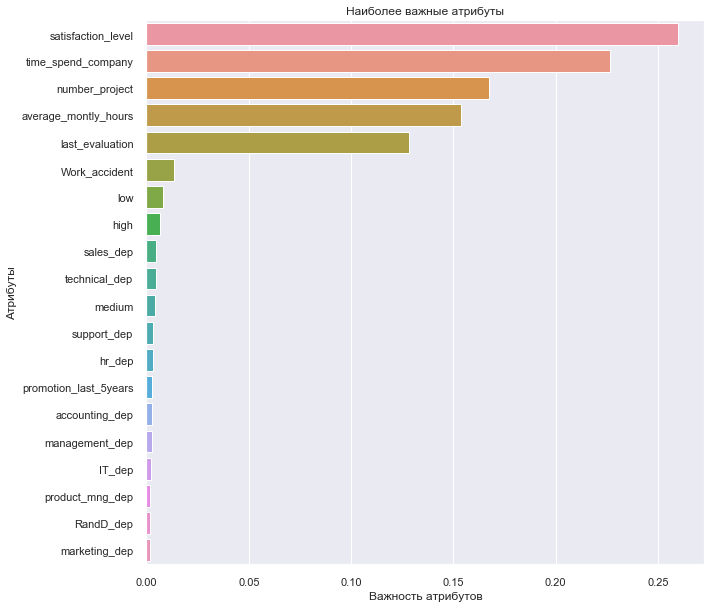

In [51]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [52]:
model.score(X_test, y_test)

0.9838095238095238